<a href="https://colab.research.google.com/github/nat-coutoune/Grupo_Python_LGE/blob/main/Nat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rascunho Renato Santos e Yasmine Alves - Dia 3


[Dados](https://aricjournal.biomedcentral.com/articles/10.1186/s13756-019-0487-5)


Os dados da atividade prática envolvem:
 * Resistência a antimicrobianos no Líbano
 * Dados de 13 hospitais nos anos de 2015 e 2016
 * Foram quantificadas suscetibilidade em:
  * Diferentes grupos de bactéria
  * Diferentes antimicrobianos
 * Comparações são realizadas entre os resultados obtidos em 2015-2016 e os obtidos em 2011-2013
 * Métodos usados foram:
  * Manuais e/ou automáticos
  * CLSI e/ou EUCAST


## Objetivos didáticos

 * Quebrar colunas com strings com base em um delimitador
 * Criar novas colunas (Series) em um dataframe a partir do `split`
 * Identificar tipos de dados no dataframe e realizar conversões entre os tipos
 * Apresentar como tomar decisões baseadas em condicionais
 * Converter dados faltantes representes de diferentes formas (e.g., "NR" no caso deste artigo) para representações "analisáveis" (NaN)
 * Outros.......



## Importando os dados da atividade

Nesta parte da atividade, vamos analisar a tabela 1 do texto principal. Ela apresenta:
 * Hospitais
 * Região
 * Tipo
 * Número de beds (o que significa isso??????)
 * Método microbiológico utilizado
 * Guidelines


In [ ]:
import pandas as pd

In [ ]:
tabela1 = pd.read_table('/content/drive/MyDrive/TUDO 2022/Organização Workshop Python Dados Microbio 2022/Organização do Material e Cadernos de Aula/Material de Aulas/Dia 3/Rascunhos/Dados/table_1_maintext.txt')

In [ ]:
tabela1

,Hospital,Region,Type,Beds,Microbiological_Method,Guidelines
0,HDF,Beirut,University,444,Automated,EUCAST
1,LAUMC-RH,Beirut,University,114,Manual,CLSI+EUCAST
2,RHUH,Beirut,University,250,Automated,CLSI
3,AUBMC,Beirut,University,380,Manual,CLSI
4,MGH,Beirut,University,170,Manual,CLSI
5,Zahraa,MountLebanon,University,201,Manual+Automated,CLSI
6,CHU-NDS,MountLebanon,University,250,Automated,CLSI+EUCAST
7,MEIH,MountLebanon,University,150,Manual,EUCAST
8,SGH,MountLebanon,University,400,Manual,CLSI
9,Nini,NorthLebanon,Community,175,Manual,CLSI


In [ ]:
tabela1['Type'].value_counts()

University    10
Community      3
Name: Type, dtype: int64

In [ ]:
tabela1['Type'].value_counts().index

Index(['University', 'Community'], dtype='object')

In [ ]:
tabela1['Type'].value_counts().values

array([10,  3])

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

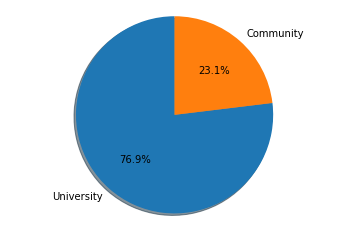

In [ ]:
fig1, ax1 = plt.subplots()

ax1.pie(tabela1['Type'].value_counts().values, labels=tabela1['Type'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

A próxima etapa vai ser olhar para material suplementar do artigo, olhando para algumas análises estruturais do additional_file_3, que apresenta o percentual de amostras de _E. coli_ e de _Klebsiella spp_ consideradas suscetíveis a antibiótico, em 13 hospitais no Líbano, entre 2015 e 2016.

Os dados originais foram modificados com a finalidade de:
 * Usar arquivo(s) que melhor representa(m) dados tabulados (Excel ou arquivos de texto plano com delimitadores)
 * Como as mesmas informações são apresentadas para os dois gêneros de bactéria, a tabela foi modificada para incluir uma coluna com a variável categórica indicando o grupo de bactérias

Como já vimos nas atividades anteriores, é possível importar dados tabulados em diferentes formatos de arquivo. Entre eles:
 * tsv (tab-separated values) e arquivos delimitados em geral
 * csv (comma-separated values)
 * MS Excel ou OpenDocument (arquivos .xlsx)

Para cada um destes tipos de diferentes de arquivos, temos funções de pandas:
 * read_table
 * read_csv
 * read_excel

 Há uma série de [outros formatos e maneiras de lidar com estes arquivos](https://pandas.pydata.org/docs/user_guide/io.html#io).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ao lado esquerdo do caderno há uma opção "Files". Ali, é possível selecionar na árvore de diretórios exatamente o arquivo de interesse. Após selecionar o arquivo, copie o caminho usando "copy path":

In [ ]:
# af3 - nome temporário para a variável
af3_csv = pd.read_csv('/content/drive/MyDrive/TUDO 2022/Organização Workshop Python Dados Microbio 2022/Organização do Material e Cadernos de Aula/Material de Aulas/Dia 3/Rascunhos/Dados/additional_file_3.csv')
af3_tsv = pd.read_table('/content/drive/MyDrive/TUDO 2022/Organização Workshop Python Dados Microbio 2022/Organização do Material e Cadernos de Aula/Material de Aulas/Dia 3/Rascunhos/Dados/additional_file_3.tsv')
af3_excel = pd.read_excel('/content/drive/MyDrive/TUDO 2022/Organização Workshop Python Dados Microbio 2022/Organização do Material e Cadernos de Aula/Material de Aulas/Dia 3/Rascunhos/Dados/additional_file_3.xlsx')

In [ ]:
af3_csv.head()

,Antibiotics,Number of tested isolates,%S(Range),Taxon
0,Amikacin,41818,90 (70-100),Escherichia coli
1,Amoxicillin/clavulanic acid,39116,59 (42-72),Escherichia coli
2,Ampicillin,35906,24 (12-31),Escherichia coli
3,Aztreonam,40029,57 (22-73),Escherichia coli
4,Cefepime,40524,63 (47-74),Escherichia coli


Já vimos isso anteriormente, mas sempre vale a pena relembrar:

 * Quais as colunas do nosso dataframe?
 * Qual o tipo de dado em cada coluna do nosso dataframe?

In [ ]:
af3_csv.columns

Index(['Antibiotics', 'Number of tested isolates', '%S(Range)', 'Taxon'], dtype='object')

In [ ]:
af3_csv.dtypes

Antibiotics                  object
Number of tested isolates    object
%S(Range)                    object
Taxon                        object
dtype: object

Estamos analisando dois taxa. Vamos vamos ver:
 
 * Quantos valores únicos temos na coluna "Taxon" ?
 * Quantas linhas temos na nossa tabela (nosso dataframe) para cada taxon ?


In [ ]:
af3_csv['Taxon'].nunique()

2

In [ ]:
af3_csv['Taxon']

0     Escherichia coli
1     Escherichia coli
2     Escherichia coli
3     Escherichia coli
4     Escherichia coli
5     Escherichia coli
6     Escherichia coli
7     Escherichia coli
8     Escherichia coli
9     Escherichia coli
10    Escherichia coli
11    Escherichia coli
12    Escherichia coli
13    Escherichia coli
14    Escherichia coli
15    Escherichia coli
16    Escherichia coli
17    Escherichia coli
18    Escherichia coli
19    Escherichia coli
20    Escherichia coli
21      Klebsiella spp
22      Klebsiella spp
23      Klebsiella spp
24      Klebsiella spp
25      Klebsiella spp
26      Klebsiella spp
27      Klebsiella spp
28      Klebsiella spp
29      Klebsiella spp
30      Klebsiella spp
31      Klebsiella spp
32      Klebsiella spp
33      Klebsiella spp
34      Klebsiella spp
35      Klebsiella spp
36      Klebsiella spp
37      Klebsiella spp
38      Klebsiella spp
39      Klebsiella spp
40      Klebsiella spp
41      Klebsiella spp
Name: Taxon, dtype: object

In [ ]:
af3_csv['Taxon'].value_counts()

Escherichia coli    21
Klebsiella spp      21
Name: Taxon, dtype: int64

In [ ]:
af3_tsv.head()

,Antibiotics,Number of tested isolates,%S(Range),Taxon
0,Amikacin,41818,90 (70-100),Escherichia coli
1,Amoxicillin/clavulanic acid,39116,59 (42-72),Escherichia coli
2,Ampicillin,35906,24 (12-31),Escherichia coli
3,Aztreonam,40029,57 (22-73),Escherichia coli
4,Cefepime,40524,63 (47-74),Escherichia coli


In [ ]:
af3_tsv

,Antibiotics,Number of tested isolates,%S(Range),Taxon
0,Amikacin,41818,90 (70-100),Escherichia coli
1,Amoxicillin/clavulanic acid,39116,59 (42-72),Escherichia coli
2,Ampicillin,35906,24 (12-31),Escherichia coli
3,Aztreonam,40029,57 (22-73),Escherichia coli
4,Cefepime,40524,63 (47-74),Escherichia coli
5,Cefoxitin,33104,76 (58-95),Escherichia coli
6,Ceftazidime,41816,62 (51-72),Escherichia coli
7,Ceftriaxone,41816,58 (47-70),Escherichia coli
8,Cefuroxime,33106,56 (30-66),Escherichia coli
9,Ciprofloxacin,40524,57 (44-74),Escherichia coli


In [ ]:
af3_excel.head()

,Antibiotics,Number of tested isolates,%S(Range),Taxon
0,Amikacin,41818.0,90 (70-100),Escherichia coli
1,Amoxicillin/clavulanic acid,39116.0,59 (42-72),Escherichia coli
2,Ampicillin,35906.0,24 (12-31),Escherichia coli
3,Aztreonam,40029.0,57 (22-73),Escherichia coli
4,Cefepime,40524.0,63 (47-74),Escherichia coli


Verificando as informações associada a cada coluna:

In [ ]:
af3_csv.info()
print('\n') # Buscar forma mais inteligente de jogar um newline no final de cada método info
af3_tsv.info()
print('\n')
af3_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Antibiotics                42 non-null     object
 1   Number of tested isolates  42 non-null     object
 2   %S(Range)                  42 non-null     object
 3   Taxon                      42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Antibiotics                42 non-null     object
 1   Number of tested isolates  42 non-null     object
 2   %S(Range)                  42 non-null     object
 3   Taxon                      42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42

In [ ]:
print("af3_csv: ", af3_csv.shape)
print("af3_tsv: ", af3_tsv.shape)
print("af3_excel: ", af3_excel.shape)

af3_csv:  (42, 4)
af3_tsv:  (42, 4)
af3_excel:  (42, 4)


Já vimos bastante lógica boleana até agora - uma forma de verificar se todos os dataframes apresentam as mesmas dimensões é comparar as tuplas e ver se elas apresentam os mesmos valores:

In [ ]:
af3_csv.shape == af3_tsv.shape == af3_excel.shape

True

In [ ]:
af3_csv.shape is af3_tsv.shape is af3_excel.shape # Discussão teórica sobre == / is

False

## Dados faltantes

Uma das colunas do nosso dataframe apresenta dados faltantes.

Não temos informação de 'Fosfomycin' e 'Ampicilin' para _Klebsiella spp_.

Vamos explorar um pouquinho estas informações:



In [ ]:
af3_csv['Number of tested isolates'].map(type)

0     <class 'str'>
1     <class 'str'>
2     <class 'str'>
3     <class 'str'>
4     <class 'str'>
5     <class 'str'>
6     <class 'str'>
7     <class 'str'>
8     <class 'str'>
9     <class 'str'>
10    <class 'str'>
11    <class 'str'>
12    <class 'str'>
13    <class 'str'>
14    <class 'str'>
15    <class 'str'>
16    <class 'str'>
17    <class 'str'>
18    <class 'str'>
19    <class 'str'>
20    <class 'str'>
21    <class 'str'>
22    <class 'str'>
23    <class 'str'>
24    <class 'str'>
25    <class 'str'>
26    <class 'str'>
27    <class 'str'>
28    <class 'str'>
29    <class 'str'>
30    <class 'str'>
31    <class 'str'>
32    <class 'str'>
33    <class 'str'>
34    <class 'str'>
35    <class 'str'>
36    <class 'str'>
37    <class 'str'>
38    <class 'str'>
39    <class 'str'>
40    <class 'str'>
41    <class 'str'>
Name: Number of tested isolates, dtype: object

In [ ]:
pd.to_numeric(af3_csv['Number of tested isolates'])

ValueError: ignored

In [ ]:
pd.to_numeric(af3_csv['Number of tested isolates'], errors='coerce', downcast='integer')

0     41818.0
1     39116.0
2     35906.0
3     40029.0
4     40524.0
5     33104.0
6     41816.0
7     41816.0
8     33106.0
9     40524.0
10    19932.0
11    21086.0
12    41818.0
13    41813.0
14     8775.0
15    29434.0
16    40524.0
17    39050.0
18    41496.0
19    19410.0
20     2539.0
21     9498.0
22     9069.0
23        NaN
24     7924.0
25     9292.0
26     6373.0
27     9498.0
28     9498.0
29     6579.0
30     9311.0
31     5290.0
32        NaN
33     9498.0
34     9498.0
35     1410.0
36     5155.0
37     9292.0
38     8546.0
39     9498.0
40     5215.0
41      453.0
Name: Number of tested isolates, dtype: float64

In [ ]:
af3_csv['Number of tested isolates'] = pd.to_numeric(af3_csv['Number of tested isolates'], errors='coerce', downcast='integer')

In [ ]:
af3_csv

,Antibiotics,Number of tested isolates,%S(Range),Taxon
0,Amikacin,41818.0,90 (70-100),Escherichia coli
1,Amoxicillin/clavulanic acid,39116.0,59 (42-72),Escherichia coli
2,Ampicillin,35906.0,24 (12-31),Escherichia coli
3,Aztreonam,40029.0,57 (22-73),Escherichia coli
4,Cefepime,40524.0,63 (47-74),Escherichia coli
5,Cefoxitin,33104.0,76 (58-95),Escherichia coli
6,Ceftazidime,41816.0,62 (51-72),Escherichia coli
7,Ceftriaxone,41816.0,58 (47-70),Escherichia coli
8,Cefuroxime,33106.0,56 (30-66),Escherichia coli
9,Ciprofloxacin,40524.0,57 (44-74),Escherichia coli


## Dados importados do Excel

Por que meus dados do Excel são importados de forma diferente?

In [ ]:
af3_excel['Number of tested isolates'].map(type)

0     <class 'float'>
1     <class 'float'>
2     <class 'float'>
3     <class 'float'>
4     <class 'float'>
5     <class 'float'>
6     <class 'float'>
7     <class 'float'>
8     <class 'float'>
9     <class 'float'>
10    <class 'float'>
11    <class 'float'>
12    <class 'float'>
13    <class 'float'>
14    <class 'float'>
15    <class 'float'>
16    <class 'float'>
17    <class 'float'>
18    <class 'float'>
19    <class 'float'>
20    <class 'float'>
21    <class 'float'>
22    <class 'float'>
23      <class 'str'>
24    <class 'float'>
25    <class 'float'>
26    <class 'float'>
27    <class 'float'>
28    <class 'float'>
29    <class 'float'>
30    <class 'float'>
31    <class 'float'>
32      <class 'str'>
33    <class 'float'>
34    <class 'float'>
35    <class 'float'>
36    <class 'float'>
37    <class 'float'>
38    <class 'float'>
39    <class 'float'>
40    <class 'float'>
41    <class 'float'>
Name: Number of tested isolates, dtype: object

## Quebrando colunas do nosso dataframe

Em uma das colunas do nosso dataframe, "%S(Range)"


In [ ]:
import numpy as np

In [ ]:
af3_csv['%S(Range)'].str.split(' ')

0        [90, (70-100)]
1         [59, (42-72)]
2         [24, (12-31)]
3         [57, (22-73)]
4         [63, (47-74)]
5         [76, (58-95)]
6         [62, (51-72)]
7         [58, (47-70)]
8         [56, (30-66)]
9         [57, (44-74)]
10       [97, (96-100)]
11        [97, (57-99)]
12        [72, (41-92)]
13       [97, (95-100)]
14       [99, (96-100)]
15        [87, (60-98)]
16        [76, (47-90)]
17       [96, (67-100)]
18        [53, (40-65)]
19    [34.5, (29.5-39)]
20     [0.6, (0.3-3.1)]
21        [94, (66-99)]
22        [62, (42-80)]
23                 [NR]
24        [65, (37-76)]
25        [65, (38-76)]
26        [83, (53-93)]
27        [64, (39-76)]
28        [63, (35-72)]
29        [61, (27-68)]
30        [71, (56-80)]
31       [94, (86-100)]
32                 [NR]
33        [78, (61-85)]
34       [96, (90-100)]
35       [97, (90-100)]
36        [59, (30-71)]
37        [78, (46-90)]
38       [93, (61-100)]
39        [58, (45-74)]
40        [33, (25-43)]
41         [2, (

In [ ]:
af3_csv['%S(Range)'].str.split(' ').map(len)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    1
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    1
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
Name: %S(Range), dtype: int64

In [ ]:
af3_csv['%S(Range)'].str.split(' ', expand=True)

,0,1
0,90,(70-100)
1,59,(42-72)
2,24,(12-31)
3,57,(22-73)
4,63,(47-74)
5,76,(58-95)
6,62,(51-72)
7,58,(47-70)
8,56,(30-66)
9,57,(44-74)


In [ ]:
 af3_csv['Only_Percent'] = np.where(af3_csv['%S(Range)'].str.split(' ').map(len) == 2, 'A', 'B')

In [ ]:
af3_csv['Only_Percent']

0     A
1     A
2     A
3     A
4     A
5     A
6     A
7     A
8     A
9     A
10    A
11    A
12    A
13    A
14    A
15    A
16    A
17    A
18    A
19    A
20    A
21    A
22    A
23    B
24    A
25    A
26    A
27    A
28    A
29    A
30    A
31    A
32    B
33    A
34    A
35    A
36    A
37    A
38    A
39    A
40    A
41    A
Name: Only_Percent, dtype: object

## Comparação de 2011/2013 e 2015/2016 para Salmonella


In [ ]:
salmonella_susc = pd.read_excel('/content/drive/MyDrive/TUDO 2022/Organização Workshop Python Dados Microbio 2022/Organização do Material e Cadernos de Aula/Material de Aulas/Dia 3/Rascunhos/Dados/Tabela_4.xlsx')

In [ ]:
salmonella_susc

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
0,Ampicillin,784 (81%),596 (85%),1.34 (1.00–1.79),0.0600
1,Ceftriaxone,690 (97%),655 (97%),0.99 (0.53–1.87),1.0000
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


In [ ]:
salmonella_susc['Antibiotic']

0                       Ampicillin
1                      Ceftriaxone
2                    Ciprofloxacin
3    Trimethoprim/sulfamethoxazole
Name: Antibiotic, dtype: object

In [ ]:
salmonella_susc[salmonella_susc['P'] <= 0.005]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


In [ ]:
salmonella_susc.iat[2, 3]

'0.48 (0.32–0.70)'

In [ ]:
salmonella_susc.iloc[1]

Antibiotic               Ceftriaxone
2011/2013 N (%S)           690 (97%)
2015/2016 N (%S)           655 (97%)
OR (95% CI)         0.99 (0.53–1.87)
P                                1.0
Name: 1, dtype: object

In [ ]:
salmonella_susc.iloc[[1]]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
1,Ceftriaxone,690 (97%),655 (97%),0.99 (0.53–1.87),1.0


In [ ]:
salmonella_susc.iloc[[0, 3]]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
0,Ampicillin,784 (81%),596 (85%),1.34 (1.00–1.79),0.0600
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


In [ ]:
salmonella_susc.iloc[:3]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
0,Ampicillin,784 (81%),596 (85%),1.34 (1.00–1.79),0.0600
1,Ceftriaxone,690 (97%),655 (97%),0.99 (0.53–1.87),1.0000
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001


In [ ]:
salmonella_susc.loc[(salmonella_susc['P'] < 0.005)]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


In [ ]:
salmonella_susc.loc[(salmonella_susc['P'] < 0.005) & (salmonella_susc['Antibiotic'] == 'Ciprofloxacin')]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001


In [ ]:
salmonella_susc[salmonella_susc['P'].between(0.0001, 0.1)]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
0,Ampicillin,784 (81%),596 (85%),1.34 (1.00–1.79),0.0600
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


In [ ]:
salmonella_susc[~salmonella_susc['P'].between(0.0001, 0.1)]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
1,Ceftriaxone,690 (97%),655 (97%),0.99 (0.53–1.87),1.0


In [ ]:
salmonella_susc[salmonella_susc['P'].isin([0.06])]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
0,Ampicillin,784 (81%),596 (85%),1.34 (1.00–1.79),0.06


In [ ]:
salmonella_susc[salmonella_susc['P'].isin([0.0001, 0.001, 0.005])]

,Antibiotic,2011/2013 N (%S),2015/2016 N (%S),OR (95% CI),P
2,Ciprofloxacin,877 (95%),721 (90%),0.48 (0.32–0.70),0.0001
3,Trimethoprim/sulfamethoxazole,877 (92%),721 (71%),0.21 (0.16–0.28),0.0001


# Referências e Links Importantes

 * Colocar os livros usados
 * Colocar os links para fontes (StackOverFlow, Repositórios, Tutoriais de Python etc) - vamos usar no final um software para verificar plágio, para ver se não temos cópias em nossos cadernos de algo que veio da internet (tipo, EXATAMENTE o que está lá)
 